# Fast Food Items Analysis

*Jeff Sedlock*

## Goal
This project was spurred out of personal curiosity. I am interested in eating a protein dense diet. So if I am in a pinch and I need to eat at a fast food restaurant I want to know what foods to avoid and what foods to get. 

Additionally, I have heard the theory that salads are the least healthy item on a fast food menu. I would like to test that as well. This argument is specific to the large amounts of sugar in fast food salads

## Questions
 In this analysis I am looking answer the below questions
 - What restaurants/foods are the worst for you?
 - What restaurants/foods are the most protein dense?
 - Are salads worse food items on a fast food menu?

In [54]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Importing data 

data_import = pd.read_csv('fastfood.csv')
data_import.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [35]:
data_import = data_import.drop(labels = 127, axis = 0)

In [36]:
data_import.dtypes

restaurant      object
item            object
calories         int64
cal_fat          int64
total_fat        int64
sat_fat        float64
trans_fat      float64
cholesterol      int64
sodium           int64
total_carb       int64
fiber          float64
sugar            int64
protein        float64
vit_a          float64
vit_c          float64
calcium        float64
salad           object
dtype: object

In [37]:
data_import.columns

Index(['restaurant', 'item', 'calories', 'cal_fat', 'total_fat', 'sat_fat',
       'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar',
       'protein', 'vit_a', 'vit_c', 'calcium', 'salad'],
      dtype='object')

In [38]:
data_import['restaurant'].value_counts()

Taco Bell      115
Subway          96
Burger King     70
Mcdonalds       57
Arbys           55
Sonic           52
Dairy Queen     42
Chick Fil-A     27
Name: restaurant, dtype: int64

In [39]:
num_of_items = data_import.groupby(['restaurant'])['item'].count().reset_index().sort_values('item', ascending= False)
num_of_items

,restaurant,item
7,Taco Bell,115
6,Subway,96
1,Burger King,70
4,Mcdonalds,57
0,Arbys,55
5,Sonic,52
3,Dairy Queen,42
2,Chick Fil-A,27


In [40]:
# Lets plot a distribution of calories with for each restaurant

px.histogram(data_import, x = 'calories', color = 'restaurant', histnorm = 'density')


In [41]:
# Looking at the average number of calories per item for each restaurant

data_import.groupby(['restaurant'])['calories'].mean().reset_index().sort_values('calories', ascending = False)

,restaurant,calories
5,Sonic,641.923077
4,Mcdonalds,640.350877
1,Burger King,608.571429
0,Arbys,532.727273
3,Dairy Queen,520.238095
6,Subway,503.020833
7,Taco Bell,443.652174
2,Chick Fil-A,384.444444


Using the histogram and the pivot table above, it can be concluded that mcdonalds, in general, has the most unhealthy menu in terms of calories. While Chick Fil-A has the healthiest. Mcdonalds has multiple menu items that are north of 1000 calories, making them the most unhealthy.

## How much Protein?

<AxesSubplot:xlabel='protein', ylabel='calories'>

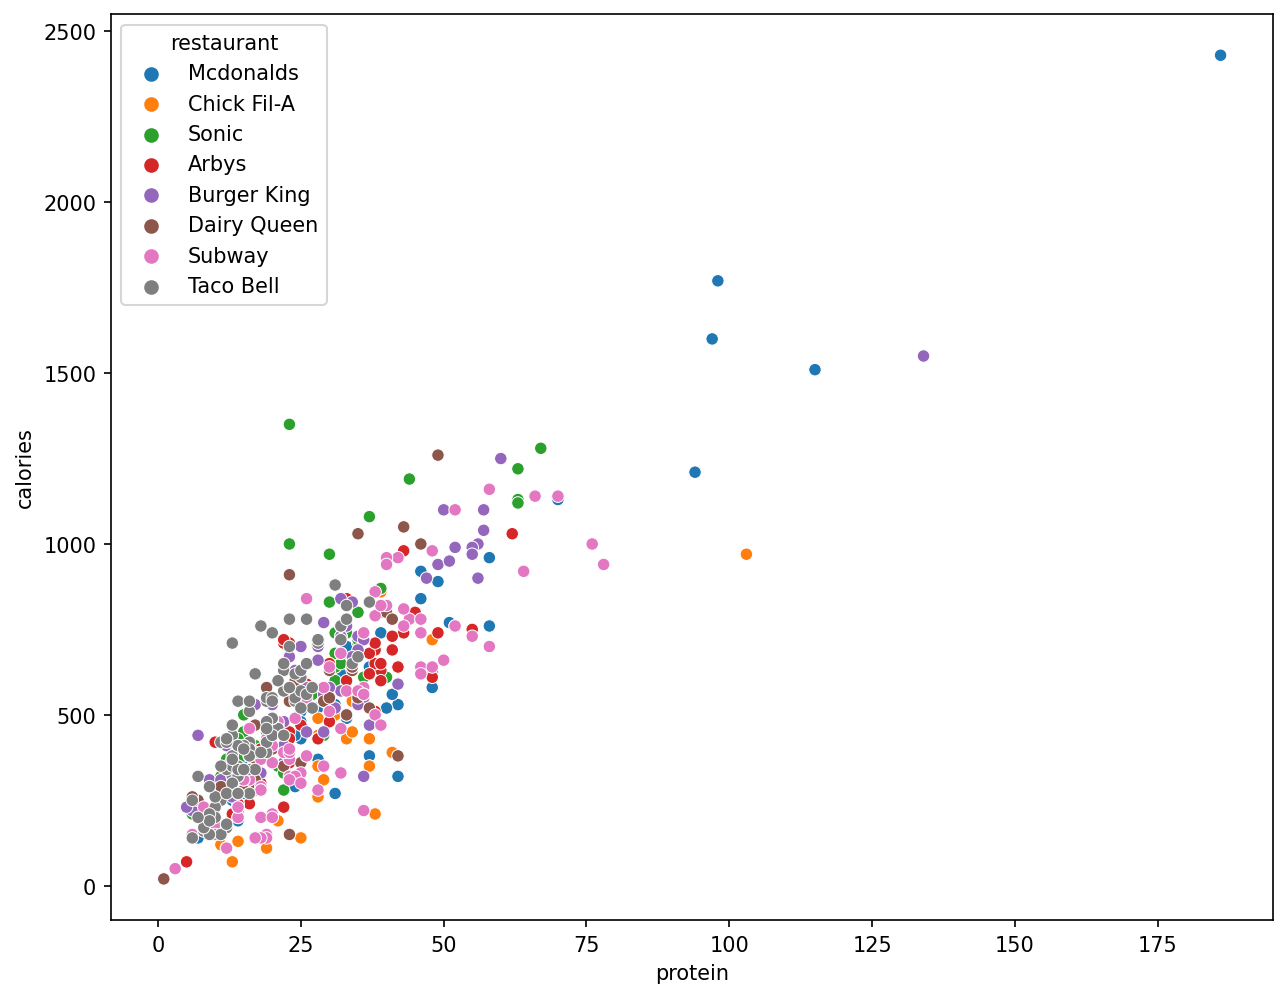

In [58]:
plt.figure(figsize=(10,8), dpi = 150)
sns.scatterplot(data=data_import, x = 'protein', y = 'calories', hue = 'restaurant')

In [42]:
# Lets create a new metric to measure the amount of protein in a menu item

data_import['protein_per_calorie'] = data_import['protein'] / data_import['calories']

In [45]:
top5_protein = data_import.sort_values('protein_per_calorie', ascending=False)[:5] # Found that the sonic ultimate chicken club had an error so dropped earlier in analysis
top5_protein

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad,protein_per_calorie
72,Chick Fil-A,4 Piece Grilled Chicken Nuggets,70,18,2,1.0,0.0,35,220,1,0.0,0,13.0,0.0,6.0,0.0,Other,0.185714
75,Chick Fil-A,12 Piece Grilled Chicken Nuggets,210,45,5,1.0,0.0,100,670,3,0.0,1,38.0,0.0,20.0,2.0,Other,0.180952
74,Chick Fil-A,8 piece Grilled Chicken Nuggets,140,36,4,1.0,0.0,70,440,2,0.0,0,25.0,0.0,10.0,2.0,Other,0.178571
73,Chick Fil-A,6 Piece Grilled Chicken Nuggets,110,27,3,1.0,0.0,50,330,2,0.0,0,19.0,0.0,8.0,0.0,Other,0.172727
378,Subway,Double Chicken Salad,220,35,5,1.5,0.0,100,490,10,4.0,4,36.0,50.0,60.0,8.0,Other,0.163636


The above list of five items show the best items to purchase at a fast food restaurant if you are prioritizing a protein dense diet

In [51]:
avg_protein = data_import.groupby('restaurant')['protein_per_calorie'].mean().reset_index().sort_values('protein_per_calorie', ascending=False)
avg_protein

,restaurant,protein_per_calorie
2,Chick Fil-A,0.095789
6,Subway,0.065871
4,Mcdonalds,0.063161
0,Arbys,0.056228
3,Dairy Queen,0.050710
1,Burger King,0.048592
5,Sonic,0.045958
7,Taco Bell,0.040759


When looking at the average number of protein grams per calorie, Subway made it second on the list which was a surpise to me. 

## Are Salads the Worst?

In [62]:
data_import['item'].str.contains('salad').value_counts()

False    514
Name: item, dtype: int64

The third part of our analysis cannot be complete, as there is not data on salad items. 